# XGBoost

**Import Libraries and Dataset**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [3]:
final2 = pd.read_csv('finale2.csv', error_bad_lines=False, parse_dates=['date'], infer_datetime_format=True)

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [5]:
X = final2.drop(['trip_id', 'date', 'events'], axis=1)
y = final2[['trip_id']]

**TT Split**

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(551, 21)
(138, 21)
(551, 1)
(138, 1)


In [7]:
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import explained_variance_score, r2_score

xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [8]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=0.75)

In [9]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,Y_test))

0.6821724062415755


In [10]:
r2 = r2_score(Y_test.values.ravel(),predictions)

In [11]:
r2

0.7373731662632053

/Applications/anaconda3/envs/nf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


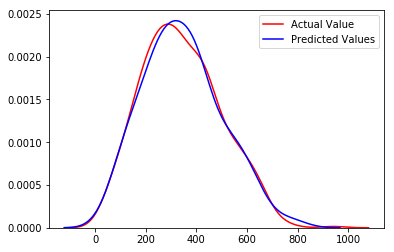

In [15]:
import seaborn as sns

ax1 = sns.distplot(Y_train, hist=False, color="r", label="Actual Value")
sns.distplot(Y_test, hist=False, color="b", label="Predicted Values" , ax=ax1)

# Conclusion

With 0.73 best result of all models